# Фрактальный бонус

Основной код, который генерирует все форму (круг, окружность, снежинку Коха, Канторово множество и форму по картинке), а также интерфейс формы находится в файле `shapes.py`. Здесь мы будем уже проводить само исследование.

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline
from shapes import *

Нарисуем наши формы чтобы проверить, что все работает нормально:

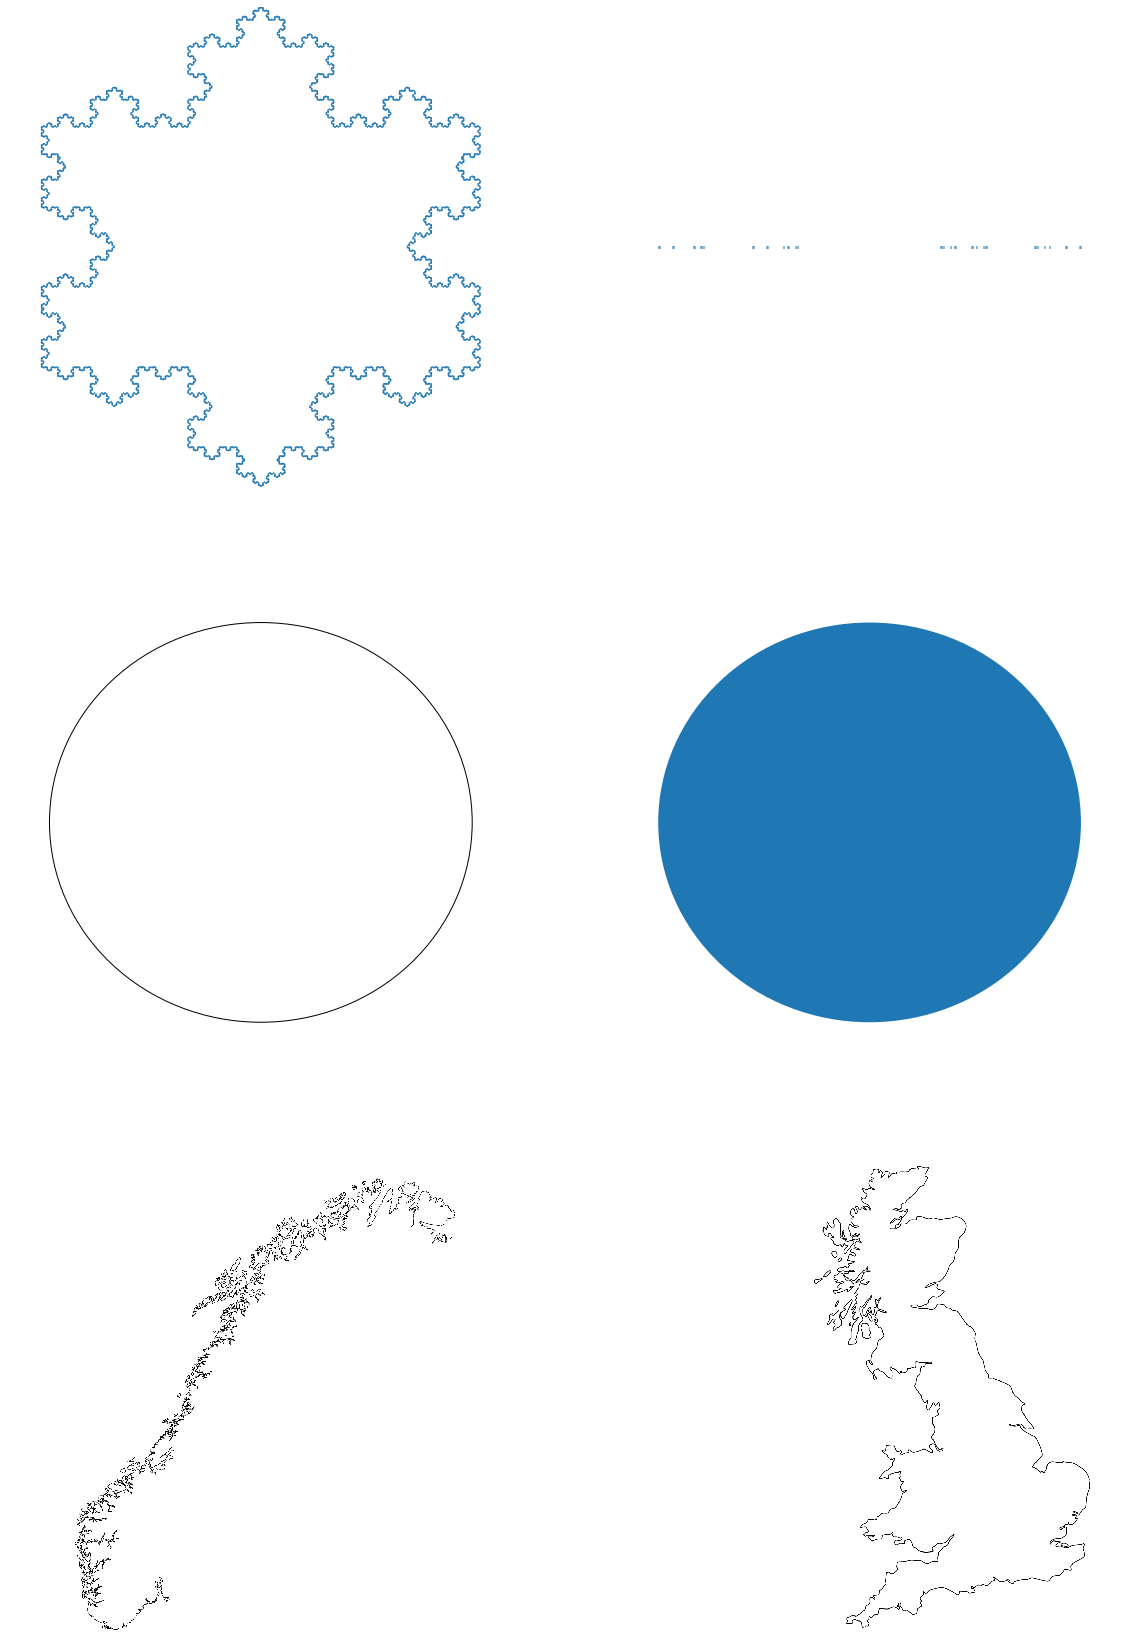

In [2]:
_, ((ax00, ax01), (ax10, ax11), (ax20, ax21)) = plt.subplots(3, 2, figsize=(20,30))

snowflake = KochSnoflake(6)
cantor = CantorSet(7)
ring = Ring()
circle = Circle()
norway = ImageShape('norway.jpg')
uk = ImageShape('uk.jpg')

snowflake.show(ax00)
cantor.show(ax01)
ring.show(ax10)
circle.show(ax11)
norway.show(ax20)
uk.show(ax21)

shapes = {
    'snowflake' : snowflake,
    'cantor' : cantor,
    'ring' : ring,
    'circle' : circle,
    'norway' : norway,
    'uk' : uk
}

plt.show()

Кажется, как минимум отрисовывается всё правильно. Теперь построим сетку на $[0; 1] \times [0; 1]$, для которой и воспользуемся методом `does_intersect` для каждой из фигур (будем надеяться, получатся примерно эти же фигуры:

In [3]:
from tqdm.notebook import tqdm
from typing import Iterable, List, Tuple

def grid_intersections(shape: Shape, ranger: Iterable, eps: float) -> List[Tuple[float, float]]:
    pts = []

    for (x, y) in tqdm(ranger):
        if shape.does_intersect(x, y, eps):
            pts.append((x, y))
    
    return pts

def draw_intersections(ax: plt.Axes, intersections: List[Tuple[float, float]]):
    (xs, ys) = list(zip(*intersections))
    ax.scatter(xs, ys)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

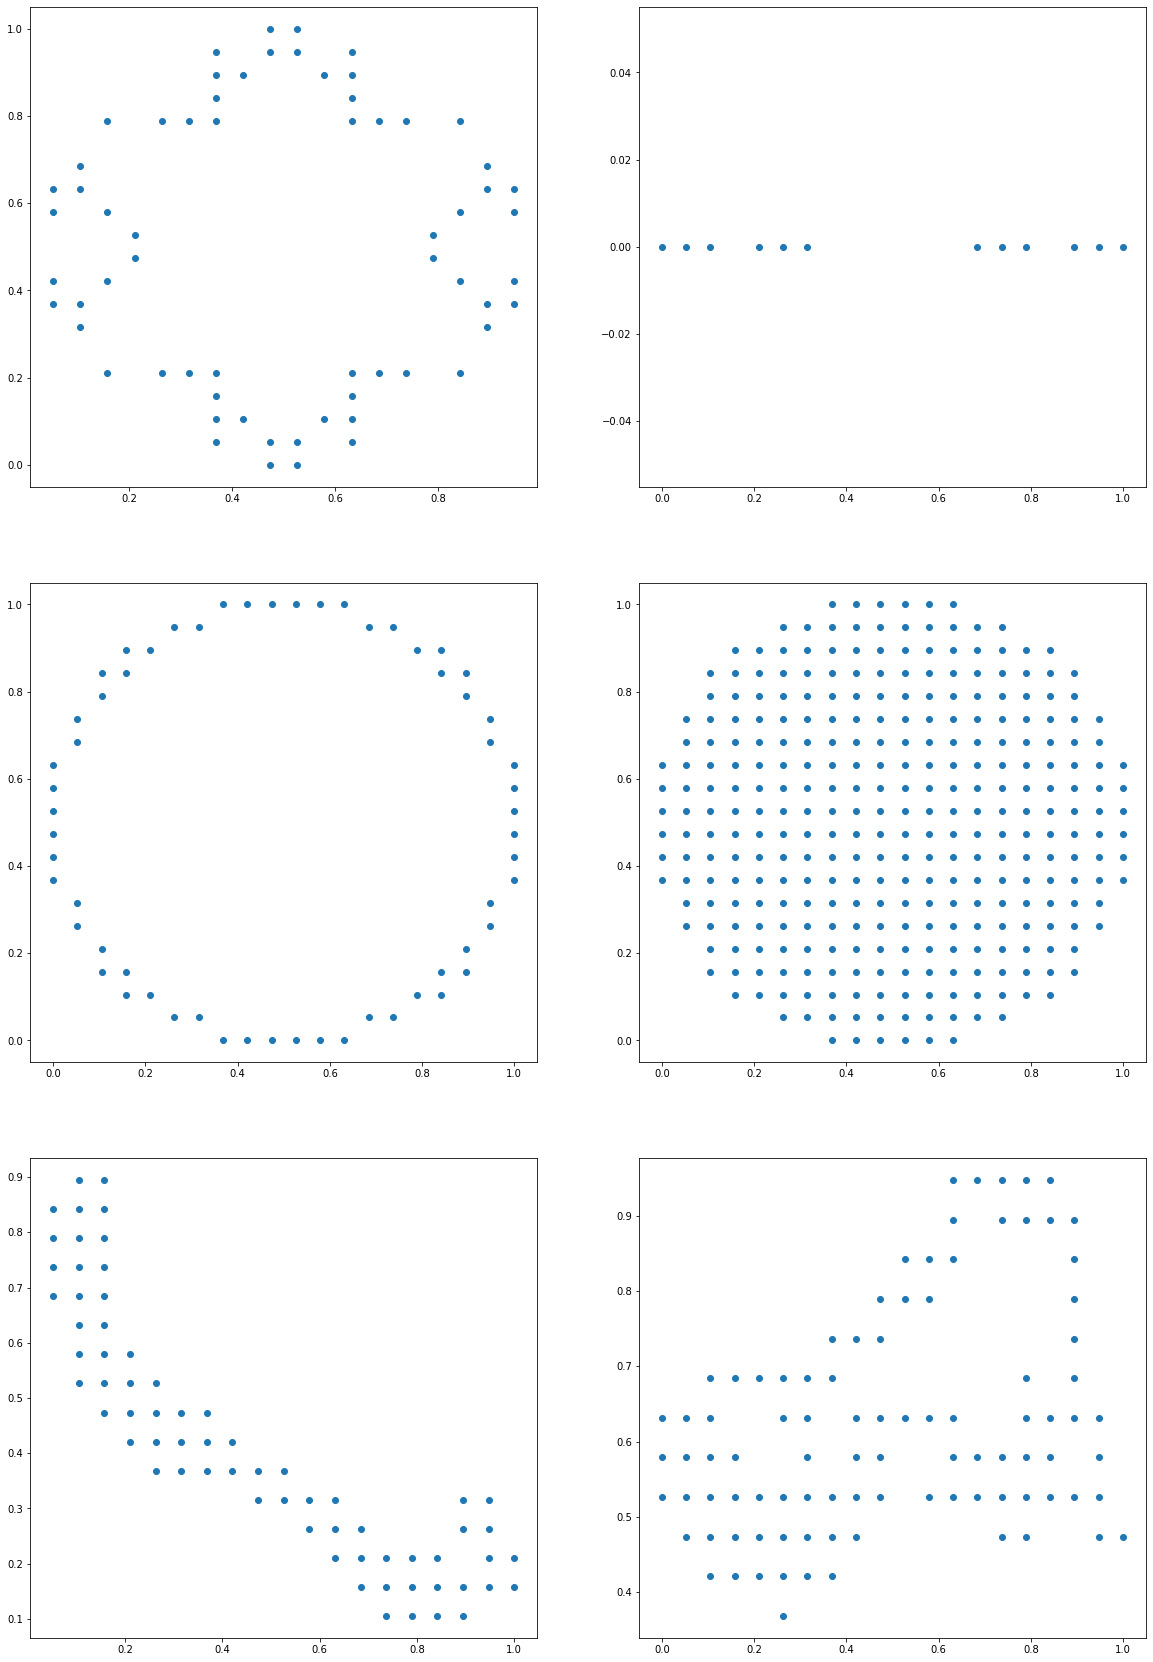

In [4]:
from itertools import product

_, axs = plt.subplots(3, 2, figsize=(20,30))

ranger = np.linspace(0, 1, 20)
eps = 1 / 40

for ((_, shape), ax) in zip(shapes.items(), axs.flat):
    inters = grid_intersections(shape, product(ranger, ranger), eps)
    draw_intersections(ax, inters)

plt.show()

Кажется, это четко то, чего мы хотели. С точностью до того, что картинки у нас перевёрнутые, но на размерность это повлиять не должно.

In [5]:
def calc_progression(shape: Shape, iters: int, borders: (float, float) = (0, 1)) -> List[Tuple[int, int]]:
    results = []
    cnt = 2
    for i in range(iters):
        xrange = np.linspace(borders[0], borders[1], cnt)
        
        inters = grid_intersections(shape, product(xrange, xrange), 1 / (2 * cnt))
        
        results.append((cnt * cnt, len(inters)))
        
        cnt = 2 * cnt
    
    return results

def show_progression(name: str):
    progression = calc_progression(shapes[name], 7)
    print(progression)
    plt.figure(figsize=(10,10))
    plt.plot([0 if cnt == 0 else np.log(cnt) for (_, cnt) in progression])
    plt.show()
    return progression

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[(4, 4), (16, 8), (64, 20), (256, 52), (1024, 96), (4096, 204), (16384, 400)]


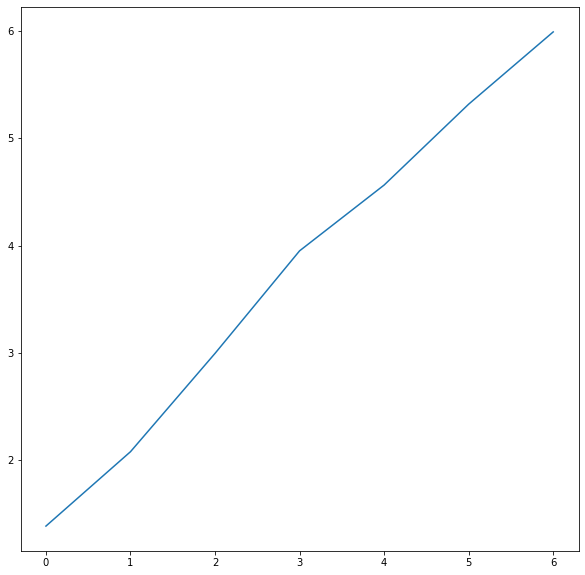

In [6]:
ring_prg = show_progression('ring')

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[(4, 4), (16, 12), (64, 52), (256, 208), (1024, 812), (4096, 3228), (16384, 12892)]


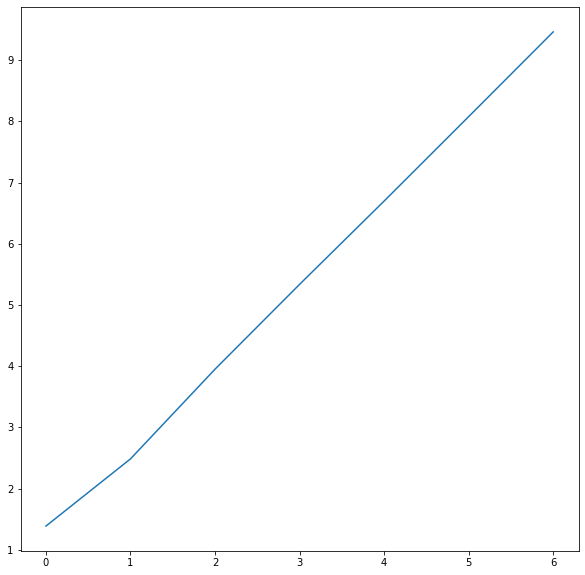

In [7]:
circle_prg = show_progression('circle')

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[(4, 2), (16, 4), (64, 6), (256, 12), (1024, 16), (4096, 24), (16384, 42)]


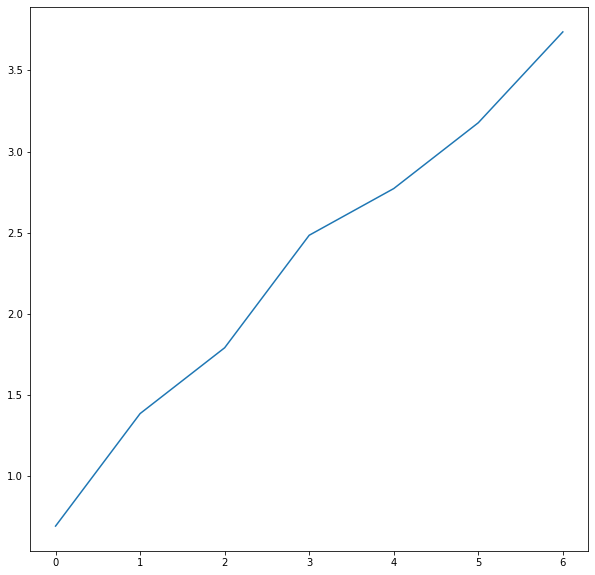

In [8]:
cantor_prg = show_progression('cantor')

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[(4, 0), (16, 4), (64, 12), (256, 64), (1024, 160), (4096, 288), (16384, 788)]


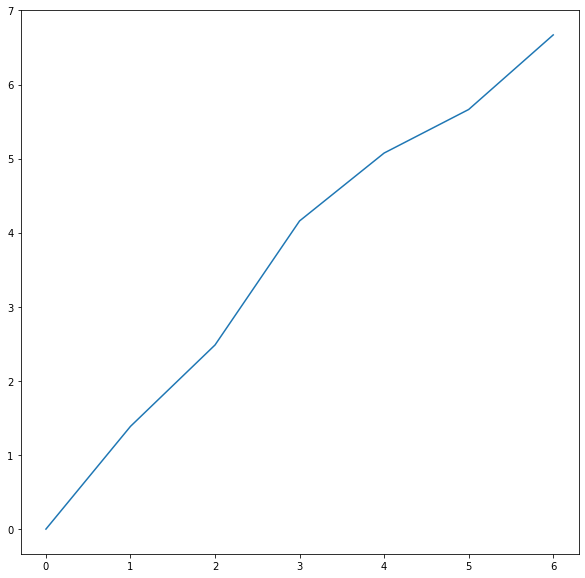

In [9]:
snowflake_prg = show_progression('snowflake') # takes a very long time

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[(4, 2), (16, 7), (64, 17), (256, 47), (1024, 131), (4096, 392), (16384, 1125)]


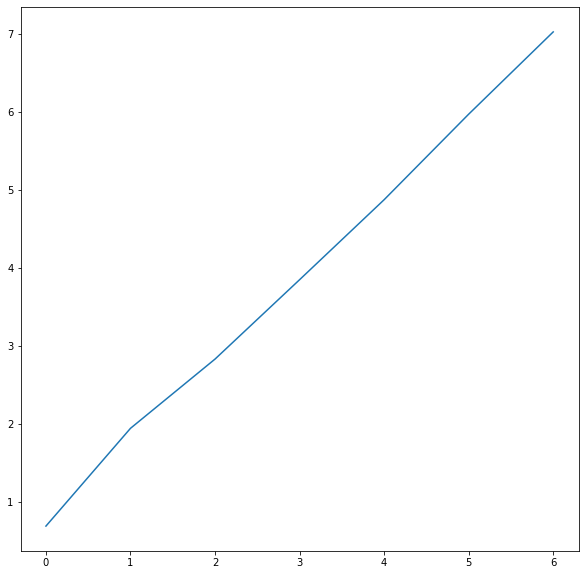

In [10]:
norway_prg = show_progression('norway') # takes even longer

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

[(4, 1), (16, 8), (64, 24), (256, 68), (1024, 170), (4096, 436), (16384, 1027)]


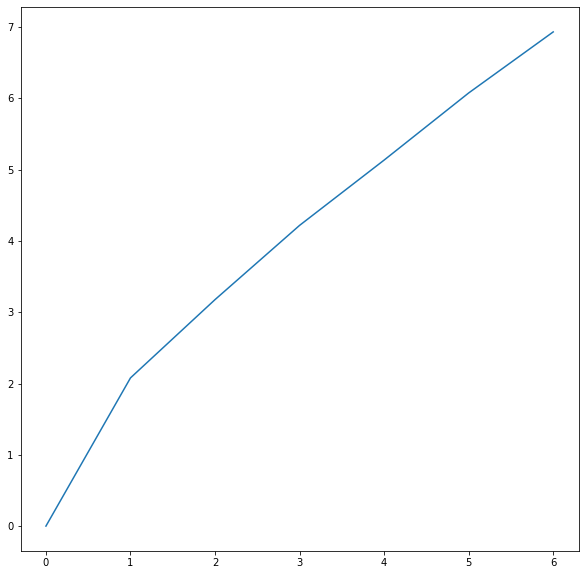

In [11]:
uk_prg = show_progression('uk') # same thing

Порисовали, пора и честь знать. Давайте искать линейности!

In [12]:
progressions = {
    'snowflake' : snowflake_prg,
    'cantor' : cantor_prg,
    'ring' : ring_prg,
    'circle' : circle_prg,
    'norway' : norway_prg,
    'uk' : uk_prg
}

In [23]:
from sklearn.linear_model import LinearRegression as LinReg

def clean_progression(progression):
    x = [0 if x == 0 else np.log(x) for (_, x) in progression]
    y = [np.log(y) / 2 for (y, _) in progression]
    
    return (y, x)

def find_linearity(X, y):
    model = LinReg(n_jobs=4)
    model.fit(X, y)
    return model.coef_[0], model.intercept_

In [24]:
X, y = clean_progression(ring_prg)
find_linearity(np.array(X).reshape(-1, 1), y)

(1.1264090592536058, 0.6321658924497564)

In [25]:
X, y = clean_progression(circle_prg)
find_linearity(np.array(X).reshape(-1, 1), y)

(1.9667995122619988, -0.10977422922182178)

In [26]:
X, y = clean_progression(cantor_prg)
find_linearity(np.array(X).reshape(-1, 1), y)

(0.7057826703234799, 0.3352149038469834)

На этих множествах мы получаем очень похожие на правду результаты, это здорово!

In [27]:
for (name, prg) in progressions.items():
    X, y = clean_progression(prg)
    d, c = find_linearity(np.array(X).reshape(-1, 1), y)
    print('progression for %s: dimensionality %.3f, multiplier %.3f' % (name.ljust(7), d, np.exp(c)))

progression for snowflake: dimensionality 1.605, multiplier 0.442
progression for cantor : dimensionality 0.706, multiplier 1.398
progression for ring   : dimensionality 1.126, multiplier 1.882
progression for circle : dimensionality 1.967, multiplier 0.896
progression for norway : dimensionality 1.499, multiplier 0.763
progression for uk     : dimensionality 1.585, multiplier 0.639


Ну вот как-то так.